In [39]:
import pandas as pd
import zipfile
from flair.data import Sentence, Corpus
from sklearn.model_selection import train_test_split
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
import torch
from torch.optim.lr_scheduler import OneCycleLR
from flair.trainers import ModelTrainer
import torch
from flair.models import TextClassifier
from flair.embeddings import TransformerDocumentEmbeddings
from torch.optim.adam import Adam
from flair.embeddings import TransformerWordEmbeddings




/Users/viniciuswoloszyn/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[]

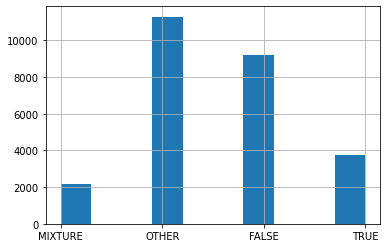

In [23]:
#opening the data
zf = zipfile.ZipFile("../data/data.csv.zip") 
df_raw = pd.read_csv(zf.open('data_out.csv'))
df_raw["rating_alternateName_normalized"]=df_raw["rating_alternateName_normalized"].str.upper() #only making sure the labels are normalized.

##taking only thet english data.
df_english=df_raw[df_raw.language=="en"][["claimReview_claimReviewed","rating_alternateName_normalized"]]
df_english.rating_alternateName_normalized.hist().plot()

In [34]:
list(y_train)[1]

'OTHER'

In [35]:
#splint the data
X=df_english["claimReview_claimReviewed"]
y=df_english["rating_alternateName_normalized"]
X_train, X_test, y_train, y_test = train_test_split(list(X), list(y), test_size=0.3, random_state=32)


##creating the corpus
train = [Sentence(X_train[i]).add_label("class",y_train[i]) for i in range(len(X_train))]
dev = [Sentence(X_test[i]).add_label("class",y_test[i]) for i in range(len(X_test))]
test = [Sentence(X_test[i]).add_label("class",y_test[i]) for i in range(len(X_test))]


'FALSE'

In [51]:
#https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_7_TRAINING_A_MODEL.md

# 1. get the corpus
corpus: Corpus = Corpus(train, dev, test)

# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()

# 3. initialize transformer document embeddings (many models are available)
document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)

# 4. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)


# 5. initialize trainer
trainer: ModelTrainer = ModelTrainer(classifier, corpus, optimizer=Adam)

# 6. start training
trainer.train('resources/taggers/trec',
              learning_rate=3e-5, # use very small learning rate
              mini_batch_size=16,
              mini_batch_chunk_size=4, # optionally set this if transformer is too much for your machine
              max_epochs=5, # terminate after 5 epochs
              )


2021-04-30 16:07:46,289 Computing label dictionary. Progress:
100%|██████████| 26468/26468 [00:00<00:00, 84802.09it/s]2021-04-30 16:07:46,605 [b'FALSE', b'OTHER', b'TRUE', b'MIXTURE']



NameError: name 'Adam' is not defined